# Prepare Test Data

> Joseph P. Vantassel, The University of Texas at Austin

Prepare test data for the `swprepost` package. Prior data included more-or-less random examples.
The new test data will follow the inversion of the first example publsihed as part of the `SWinvert` workflow (Vantassel and Cox, 2021).

In [1]:
import matplotlib.pyplot as plt

import swprepost

## Load target data

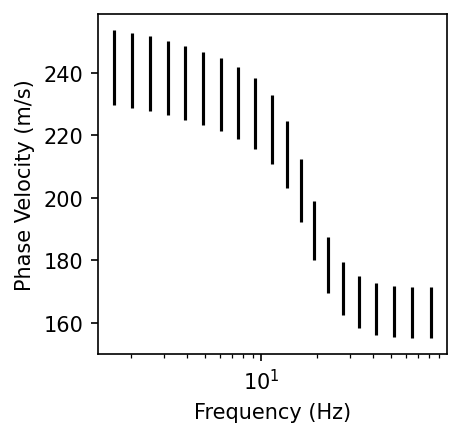

In [2]:
fname = "swinvert_tar1.csv"

with open(fname, "r") as f:
    lines = f.readlines()
    
fs, vs, ss = [], [], []
for line in lines:
    if line.startswith("#"):
        continue
    f, v, s = line.split(",")
    fs.append(float(f))
    vs.append(float(v))
    ss.append(float(s))

fig, ax = plt.subplots(figsize=(3,3), dpi=150)
ax.errorbar(fs, vs, ss, color="black", linestyle="")
ax.set_xscale("log")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Phase Velocity (m/s)")
plt.show()

## Create `.target`

In [3]:
versions = swprepost.meta.SUPPORTED_GEOPSY_VERSIONS
print(f"SUPPORTED_GEOSPY_VERSIONS: {versions}")

for version in versions:
    target = swprepost.ModalTarget(fs, vs, ss, description=(("rayleigh",0),))
    target_set = swprepost.TargetSet([target])
    target_set.to_target(f"from_tar1_{version}_swprepost", version=version)

SUPPORTED_GEOSPY_VERSIONS: ['2.10.1', '3.4.2']


## Create `.param`

In [ ]:
    ln = 3
    vs = swprepost.Parameter.from_ln(min(target.wavelength), max(target.wavelength), 3, 100, 600, False)
    vp = swprepost.Parameter.from_parameter_and_link(200, 1500, False, vs, ptype="vs")
    pr = swprepost.Parameter.from_ln(min(target.wavelength), max(target.wavelength), 1, 0.2, 0.4, False)
    rh = swprepost.Parameter.from_fx(2000)
    par = swprepost.Parameterization(vp, pr, vs, rh)
    par.to_param("ln3", version=version)